In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from spacy import displacy

#### Aula 1 - Análise abstracts

In [25]:
arqs = os.listdir('../dados')

In [26]:
for i,arq in enumerate(arqs):
    
    if i == 0:
        df = pd.read_excel(f'aula 1 - dados/{arq}')
    else:
        aux = pd.read_excel(f'aula 1 - dados/{arq}')
        df = pd.concat([df,aux])

FileNotFoundError: [Errno 2] No such file or directory: 'aula 1 - dados/savedrecs (1).xls'

In [ ]:
plt.hist(df['Language'], color='purple')
plt.title('Idiomas')
plt.show()

In [ ]:
for i,arq in enumerate(arqs):
    
    if i == 0:
        df = pd.read_excel(f'../dados/{arq}')
        df = df.loc[df['Language'] == 'English']
    else:
        aux = pd.read_excel(f'../dados/{arq}')
        aux = aux.loc[aux['Language'] == 'English']
        df = pd.concat([df,aux])

In [ ]:
plt.hist(df['Number of Pages'], color='purple')
plt.title('Número de Páginas')
plt.show()

In [ ]:
plt.hist(df['Cited Reference Count'], color='purple')
plt.title('Contagem de referências')
plt.show()

In [ ]:
plt.hist(df['Publication Year'], color='purple')
plt.title('Ano de publicação')
plt.show()

In [ ]:
qtd = 11
plt.hist(df['Research Areas'][:qtd], color='purple')
plt.title('Áreas de pesquisa')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.hist(df['Funding Orgs'].astype(str)[:qtd], color='purple')
plt.title('Orgão financiadores')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.hist(df['Publisher'][:qtd], color='purple')
plt.title('Editora')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.hist(df['Revista '].astype(str)[:qtd], color='purple')
plt.title('Journal (abreviação)')
plt.xticks(rotation=45)
plt.show()

In [4]:
dic_key={}

for keywords in df['Keywords Plus']:
    if not isinstance(keywords,float):
        
        keywords = keywords.split(' ')
        
        for keyword in keywords:
            if ';' in keyword:
                keyword = keyword.replace(';','')
            
            keyword = keyword.lower()
            
            if keyword not in dic_key:
                dic_key[keyword] = 1
            else:
                dic_key[keyword] += 1

dic_key = dict(sorted(dic_key.items(), key=lambda item: item[1]))

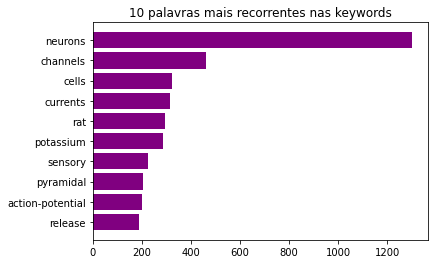

In [5]:
qtd = 10
plt.barh(list(dic_key.keys())[-qtd:],list(dic_key.values())[-qtd:],color='purple')
plt.title(f'{qtd} palavras mais recorrentes nas keywords')
plt.show()

#### Aula 2 - Extração dos valores em ms

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [31]:
limite = 20
count = 0
lista_vals, abs_vals = [], []

for abs_index,abstract in enumerate(df['Abstract']):

    if not isinstance(abstract,float):
        if ' ms ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='ms':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-10:ms_index+10]
                doc_aux = nlp(str(doc_aux))
                
                #print(doc_aux)
                for t in doc_aux:
                    if t.text=='ms':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_vals.append(vals[::-1])
                            abs_vals.append([abs_index,vals[::-1],doc_aux])      
        
        if ' millisecond ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='millisecond':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-10:ms_index+10]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='millisecond':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_vals.append(vals[::-1])
                            abs_vals.append([abs_index,vals[::-1],doc_aux])
        
        if ' milliseconds ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='milliseconds':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-10:ms_index+10]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='milliseconds':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_vals.append(vals[::-1])
                            abs_vals.append([abs_index,vals[::-1],doc_aux])

In [32]:
inf,sup = [],[]

for val in lista_vals:
    if 'and' not in val and 'to' not in val:
        
        if '+' in val and '/-' in val:
            if val[0] != '+':
                # print(val[0],'+/-',val[-1])
                
                if ',' in val[0]:
                    val[0] = val[0].replace(',','.')
                
                if ',' in val[-1]:
                    val[-1] = val[-1].replace(',','.')
                    
                inf.append(round(float(val[0])-float(val[-1]),4))
                sup.append(round(float(val[0])+float(val[-1]),4))
                
                # print(f'inf {float(val[0])-float(val[-1])}')
                # print(f'sup {float(val[0])+float(val[-1])}')
            # print()
            
        # elif '-' in val:
            # print(val)

In [34]:
print('Contagem de ocorrências',count)

Contagem de ocorrências 366


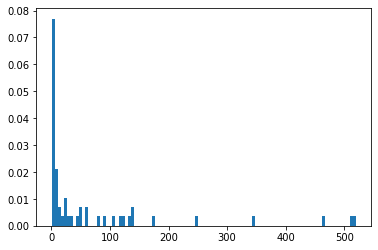

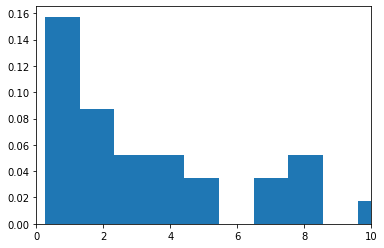

In [10]:
plt.hist(inf,bins=100,density=True, color="purple")
plt.show()
plt.hist(inf,bins=500,density=True, color="purple")
plt.xlim(0,10)
plt.show()

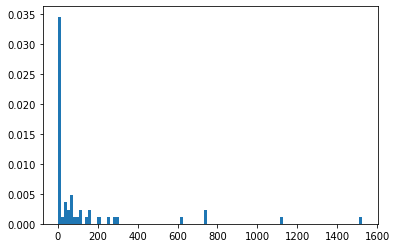

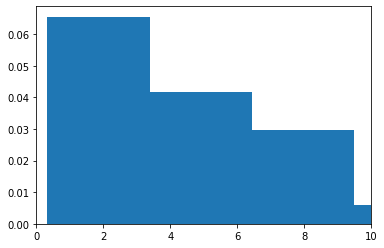

In [11]:
plt.hist(sup,bins=100,density=True, color="purple")
plt.show()
plt.hist(sup,bins=500,density=True, color="purple")
plt.xlim(0,10)
plt.show()

In [17]:
for abstract in random.sample(list(df['Abstract'].copy()), 3):
    doc = nlp(abstract)
    displacy.render(doc, style='dep', jupyter=True)

In [23]:
for abstract in random.sample(list(df['Abstract'].copy()), 3):
    if not isinstance(abstract,float):
        if ' ms ' in abstract:

            doc = nlp(abstract)

            ms_indexes = []
            for t in doc:
                if t.text=='ms':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                displacy.render(doc_aux, style='dep', jupyter=True)

        
        if ' milissecond ' in abstract:

            doc = nlp(abstract)

            ms_indexes = []
            for t in doc:
                if t.text=='ms':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                displacy.render(doc_aux, style='dep', jupyter=True)


#### Aula 3 - REGEX: Regular Expressions